In [897]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.graph_objects as go
import matplotlib.pyplot  as plt
import plotly.express as px
from collections import Counter
import re
import unidecode
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk 
import string     
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

In [898]:
train = pd.read_csv('Disaster_train.csv')

In [899]:
#Glance at the train data
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test = pd.read_csv('Disaster_test.csv')

In [6]:
#Glance at the test data
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [275]:
#Checking the shape of train and test data
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [8]:
#Let's focus on train data set first
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [542]:
#Code to check missing values in train dataset
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<BarContainer object of 5 artists>

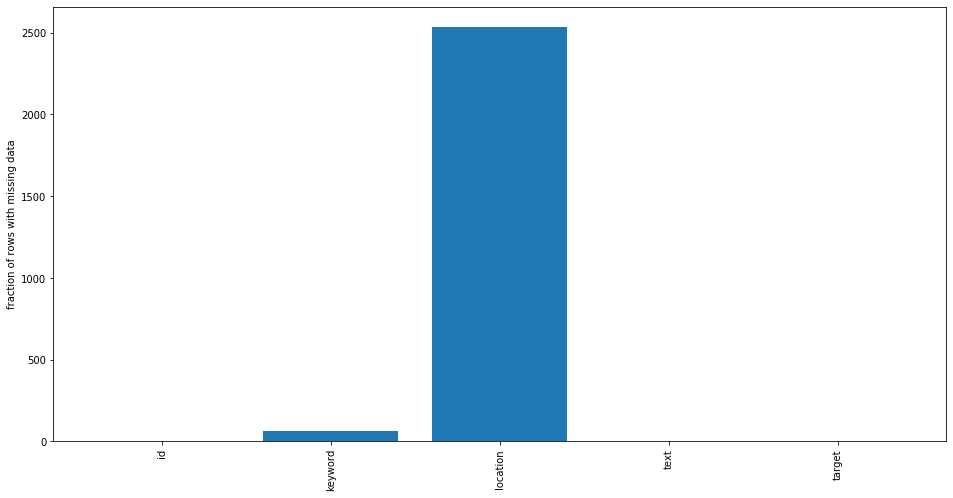

In [10]:
#Plotting the missing values
null_counts = train.isnull().sum()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [277]:
#Count of location
ax = train['location'].value_counts()
df_loc = pd.DataFrame(ax)
df_loc.head()

,location
USA,104
New York,71
United States,50
London,45
Canada,29


In [900]:
#Filling the missing values for location using 'Other_location'
train['location'].fillna(value = 'Other_location',inplace=True)

In [901]:
#Handling missing values for keyword column
train['keyword'].fillna(value = 'Unknown',inplace=True)

In [902]:
train.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [15]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<BarContainer object of 2 artists>

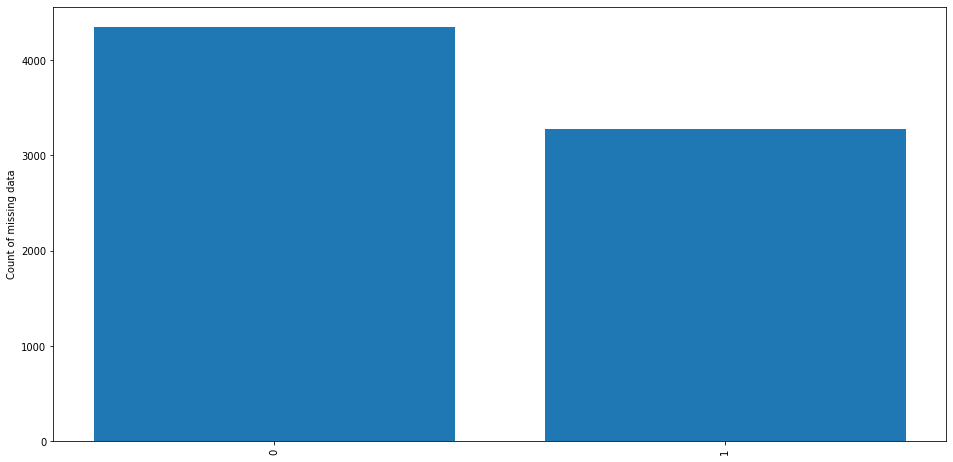

In [16]:
#Checking the number of target variables
target = train['target'].value_counts()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(target)),target.index,rotation='vertical')
plt.ylabel('Count of missing data')
plt.bar(np.arange(len(target)),target)

In [17]:
df_loc.head()
df_loc.to_excel('Loc.xlsx')

In [903]:
train.head()

,id,keyword,location,text,target
0,1,Unknown,Other_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,Unknown,Other_location,Forest fire near La Ronge Sask. Canada,1
2,5,Unknown,Other_location,All residents asked to 'shelter in place' are ...,1
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1
4,7,Unknown,Other_location,Just got sent this photo from Ruby #Alaska as ...,1


In [19]:
#Checking the most number of keywords in disaster tweets
df_disaster = pd.DataFrame(train[train['target']==1].keyword)
r = Counter(df_disaster['keyword'])
r = dict(r.most_common())
r_count = list(r.values())
print(r_count[0:4])
r_values = list(r.keys())
print(r_values[0:4])

[42, 39, 39, 39]
['Unknown', 'derailment', 'outbreak', 'wreckage']


In [20]:
#Merging the dataframes to produce a keyword-frequency dataframe 
dis1 = pd.DataFrame(r_values[0:20],columns = ['Keywords'])
dis2 = pd.DataFrame(r_count[0:20],columns = ['Frequency'])
dis3 = pd.concat([dis1,dis2],axis=1)

In [21]:
#Top
a = pd.DataFrame(train[train['target']==0])
b = Counter(a['keyword'])
b = dict(b.most_common())
b_value = list(b.keys())
d1 = pd.DataFrame(b_value[0:20],columns=['Keywords'])
b_count = list(b.values())
d2 = pd.DataFrame(b_count[0:20],columns=['Frequency'])

In [22]:
d3 = pd.concat([d1,d2],axis = 1)

In [23]:
d3.to_excel('d3.xlsx')

In [42]:
#Checking the length of tweets(number of cahracters) in disaster as well as non-disaster
train.head()

,id,keyword,location,text,target
0,1,Unknown,Other_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,Unknown,Other_location,Forest fire near La Ronge Sask. Canada,1
2,5,Unknown,Other_location,All residents asked to 'shelter in place' are ...,1
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1
4,7,Unknown,Other_location,Just got sent this photo from Ruby #Alaska as ...,1


In [50]:
df_0 = train[train['target'] == 0]
df_1 = train[train['target'] == 1]

In [53]:
#Using len function to check the length of each tweet
df_0['length'] = df_0['text'].str.len()
df_1['length'] = df_1['text'].str.len()

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
#Writing to an excel file to visualise in tableau
df_0.to_excel('df_0.xlsx')

In [57]:
#Writing to an excel file to visualise in tableau
df_1.to_excel('df_1.xlsx')

In [546]:
train.head()    

,id,keyword,location,text,target
0,1,Unknown,Other_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,Unknown,Other_location,Forest fire near La Ronge Sask. Canada,1
2,5,Unknown,Other_location,All residents asked to 'shelter in place' are ...,1
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1
4,7,Unknown,Other_location,Just got sent this photo from Ruby #Alaska as ...,1


In [61]:
df_0.head()

,id,keyword,location,text,target,length
15,23,Unknown,Other_location,What's up man?,0,14
16,24,Unknown,Other_location,I love fruits,0,13
17,25,Unknown,Other_location,Summer is lovely,0,16
18,26,Unknown,Other_location,My car is so fast,0,17
19,28,Unknown,Other_location,What a goooooooaaaaaal!!!!!!,0,28


In [70]:
#Word count
df_0['char_count'] = df_0['text'].apply(lambda x : len(str(x).split()))
df_1['char_count'] = df_1['text'].apply(lambda x : len(str(x).split()))

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
df_0.head()

,id,keyword,location,text,target,length,char_count
15,23,Unknown,Other_location,What's up man?,0,14,3
16,24,Unknown,Other_location,I love fruits,0,13,3
17,25,Unknown,Other_location,Summer is lovely,0,16,3
18,26,Unknown,Other_location,My car is so fast,0,17,5
19,28,Unknown,Other_location,What a goooooooaaaaaal!!!!!!,0,28,3


In [71]:
df_1.head()

,id,keyword,location,text,target,length,char_count
0,1,Unknown,Other_location,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,Unknown,Other_location,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,Unknown,Other_location,All residents asked to 'shelter in place' are ...,1,133,22
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,Unknown,Other_location,Just got sent this photo from Ruby #Alaska as ...,1,88,16


In [72]:
#Writing file for tableau visualisations
df_0.to_excel('df_00.xlsx')
df_1.to_excel('df_11.xlsx')

In [84]:
#Code to check the unique words in the tweet
df_0['unique'] = df_0['text'].apply(lambda x : len(set(str(x).split())))
df_1['unique'] = df_1['text'].apply(lambda x : len(set(str(x).split())))

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
#Writing file for tableau visualisations
df_0.to_excel('df_000.xlsx')
df_1.to_excel('df_111.xlsx')

In [108]:
df_0['mention'] = df_0['text'].apply(lambda x : len([word for word in x.split() if word.startswith("@")]))
df_1['mention'] = df_1['text'].apply(lambda x : len([word for word in x.split() if word.startswith("@")]))

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
#To check the number of mentions
print(df_0['mention'].sum())
print(df_1['mention'].sum())

1795
869


In [113]:
#Finding hashtagged words
#Finding words with # attached to it
df_0['#'] = df_0['text'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
df_1['#'] = df_1['text'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

hash0 = hashtag_extract(df_0['text'])

# extracting hashtags from disaster tweets
hash1 = hashtag_extract(df_1['text'])

# Converting a multidimensional list to a 1-D list
hash0 = sum(hash0,[])
hash1 = sum(hash1,[])

In [130]:
hash00 = Counter(hash0)
a = dict(hash00.most_common())

In [131]:
a

{'hot': 18,
 'prebreak': 17,
 'best': 17,
 'news': 15,
 'GBBO': 13,
 'islam': 11,
 'NowPlaying': 10,
 'nowplaying': 10,
 'jobs': 9,
 'EDM': 8,
 'DnB': 8,
 'Beyhive': 8,
 'Directioners': 8,
 'RT': 7,
 'Dubstep': 7,
 'TrapMusic': 7,
 'Dance': 7,
 'Ices': 7,
 'animalrescue': 7,
 'MTVHottest': 6,
 'hiring': 6,
 'Job': 6,
 'job': 6,
 'Nursing': 6,
 'Handbag': 5,
 'Womens': 5,
 'IranDeal': 5,
 'Seattle': 5,
 'Emmerdale': 5,
 'Fashion': 5,
 'SoundCloud': 5,
 'Jobs': 5,
 'News': 5,
 'nsfw': 4,
 'LGBT': 4,
 'kindle': 4,
 'BB17': 4,
 'fashion': 4,
 'BlueJays': 4,
 'Chemical': 4,
 'Dependency': 4,
 'business': 4,
 'technology': 4,
 'course': 4,
 'np': 4,
 '1': 4,
 'SummerFate': 4,
 'Hiring': 4,
 'ProphetMuhammad': 4,
 'art': 4,
 'Afterlife': 4,
 '7': 4,
 'RAmag': 4,
 'Models': 4,
 'Mayhem': 4,
 'Mets': 3,
 'PBBan': 3,
 'ARMAGEDDON': 3,
 'UltimaLucha': 3,
 'US': 3,
 'TBT': 3,
 'HarryBeCareful': 3,
 'cool': 3,
 'rockin': 3,
 'ArtistsUnited': 3,
 'FETTILOOTCH': 3,
 'SLANGLUCCI': 3,
 'emmerdale': 3,


In [132]:
a0_values = list(a.keys())
a0_count = list(a.values())

In [133]:
hash11 = Counter(hash1)
b = dict(hash11.most_common())

In [134]:
b0_values = list(b.keys())
b1_count = list(b.values())

In [139]:
a = pd.DataFrame(a0_values[0:20],columns=['Non-disaster # words'])
b = pd.DataFrame(a0_count[0:20],columns=['Frequency of non-disaster # words'])
c = pd.DataFrame(b0_values[0:20],columns=['Disaster # words'])
d = pd.DataFrame(b1_count[0:20],columns=['Frequency of disaster # words'])
e = pd.concat([a,b,c,d],axis=1)

In [140]:
e

,Non-disaster # words,Frequency of non-disaster # words,Disaster # words,Frequency of disaster # words
0,hot,18,News,33
1,prebreak,17,news,23
2,best,17,Hiroshima,21
3,news,15,hot,13
4,GBBO,13,prebreak,13
5,islam,11,best,13
6,NowPlaying,10,Japan,10
7,nowplaying,10,India,10
8,jobs,9,yyc,10
9,EDM,8,Sismo,9


In [144]:
#Normal histogram of Disaster # words
fig = px.bar(e, x="Disaster # words", y="Frequency of disaster # words",
            hover_name="Disaster # words",color = 'Disaster # words')
fig.update_layout(title='Top 20 # words for disaster tweets', title_x=0.5)
fig.show()

In [147]:
#Normal histogram of non-disaster # words
fig = px.bar(e, x="Non-disaster # words", y="Frequency of non-disaster # words",
            hover_name="Non-disaster # words",color = 'Frequency of non-disaster # words')
fig.update_layout(title='Top 20 # words for non-disaster tweets', title_x=0.5)
fig.show()

In [879]:
df_0.head()

,id,keyword,location,text,target,length,char_count,unique,mention,#,polarity,Sentiment,clean_text,punct,punct1
15,23,Unknown,Other_location,what's up man?,0,14,3,3,0,,0.0,Neutral,what's man?,2,"[', ?]"
16,24,Unknown,Other_location,i love fruits,0,13,3,3,0,,0.5,Positive,love fruits,0,[]
17,25,Unknown,Other_location,summer is lovely,0,16,3,3,0,,0.5,Positive,summer lovely,0,[]
18,26,Unknown,Other_location,my car is so fast,0,17,5,5,0,,0.2,Positive,car fast,0,[]
19,28,Unknown,Other_location,what a goooooooaaaaaal!!!!!!,0,28,3,3,0,,0.0,Neutral,goooooooaaaaaal!!!!!!,6,"[!, !, !, !, !, !]"


In [888]:
def mentions_extract(x):
    mentions = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"@(\w+)", i)
        mentions.append(ht)

    return hashtags

men0 = hashtag_extract(df_0['text'])

# extracting hashtags from disaster tweets
men1 = hashtag_extract(df_1['text'])

# Converting a multidimensional list to a 1-D list
men0 = sum(men0,[])
men1 = sum(men1,[])

In [891]:
z = Counter(men0)
a = dict(z.most_common())
a0_values = list(a.keys())
a0_count = list(a.values())

x = Counter(men1)
b = dict(x.most_common())
b0_values = list(b.keys())
b1_count = list(b.values())

p = pd.DataFrame(a0_values[0:20],columns=['Non-disaster mentions'])
q = pd.DataFrame(a0_count[0:20],columns=['Frequency of non-disaster mentions'])
r = pd.DataFrame(b0_values[0:20],columns=['Disaster mentions'])
s = pd.DataFrame(b1_count[0:20],columns=['Frequency of disaster mentions'])
t = pd.concat([p,q,r,s],axis=1)

In [895]:
t.to_excel('Mentions.xlsx')

In [893]:
#Normal histogram of Disaster # words
fig = px.bar(t, x="Disaster mentions", y="Frequency of disaster mentions",
            hover_name="Disaster mentions",color = 'Disaster mentions')
fig.update_layout(title='Top 20 mentions for disaster tweets', title_x=0.5)
fig.show()

In [ ]:
#Normal histogram of Disaster # words
fig = px.bar(t, x="Disaster mentions", y="Frequency of disaster mentions",
            hover_name="Disaster mentions",color = 'Disaster mentions')
fig.update_layout(title='Top 20 mentions for disaster tweets', title_x=0.5)
fig.show()

In [148]:
df_0.head()

,id,keyword,location,text,target,length,char_count,unique,mention,#
15,23,Unknown,Other_location,What's up man?,0,14,3,3,0,
16,24,Unknown,Other_location,I love fruits,0,13,3,3,0,
17,25,Unknown,Other_location,Summer is lovely,0,16,3,3,0,
18,26,Unknown,Other_location,My car is so fast,0,17,5,5,0,
19,28,Unknown,Other_location,What a goooooooaaaaaal!!!!!!,0,28,3,3,0,


In [149]:
pip install TextBlob

  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [153]:
from textblob import TextBlob
df_0['polarity'] = df_0['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_1['polarity'] = df_1['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
#Writing file for tableau visualisations
df_0.to_excel('df_0pol.xlsx')
df_1.to_excel('df_1pol.xlsx')

In [157]:
def sentiment(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'

In [162]:
df_0['Sentiment'] = df_0['polarity'].apply(lambda x : sentiment(x))
df_1['Sentiment'] = df_1['polarity'].apply(lambda x : sentiment(x))

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
df_0.head()

,id,keyword,location,text,target,length,char_count,unique,mention,#,polarity,Sentiment
15,23,Unknown,Other_location,What's up man?,0,14,3,3,0,,0.0,Neutral
16,24,Unknown,Other_location,I love fruits,0,13,3,3,0,,0.5,Positive
17,25,Unknown,Other_location,Summer is lovely,0,16,3,3,0,,0.5,Positive
18,26,Unknown,Other_location,My car is so fast,0,17,5,5,0,,0.2,Positive
19,28,Unknown,Other_location,What a goooooooaaaaaal!!!!!!,0,28,3,3,0,,0.0,Neutral


Text(0.5, 0, 'Sentiment')

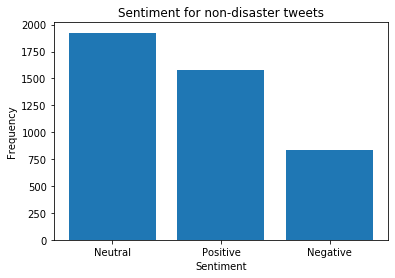

In [166]:
#Sentiment for non-disaster tweet
plt.bar(df_0.Sentiment.value_counts().index,
        df_0.Sentiment.value_counts())
plt.title('Sentiment for non-disaster tweets')
plt.ylabel('Frequency')
plt.xlabel('Sentiment')

Text(0.5, 0, 'Sentiment')

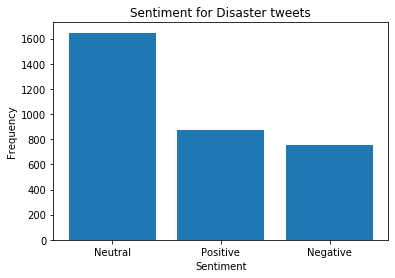

In [167]:
#Sentiment for disaster tweet
plt.bar(df_1.Sentiment.value_counts().index,
        df_1.Sentiment.value_counts())
plt.title('Sentiment for Disaster tweets')
plt.ylabel('Frequency')
plt.xlabel('Sentiment')

In [170]:
TextBlob('100 people killed').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [171]:
train.head()

,id,keyword,location,text,target
0,1,Unknown,Other_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,Unknown,Other_location,Forest fire near La Ronge Sask. Canada,1
2,5,Unknown,Other_location,All residents asked to 'shelter in place' are ...,1
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1
4,7,Unknown,Other_location,Just got sent this photo from Ruby #Alaska as ...,1


In [184]:
df_0.head()

,id,keyword,location,text,target,length,char_count,unique,mention,#,polarity,Sentiment
15,23,Unknown,Other_location,What's up man?,0,14,3,3,0,,0.0,Neutral
16,24,Unknown,Other_location,I love fruits,0,13,3,3,0,,0.5,Positive
17,25,Unknown,Other_location,Summer is lovely,0,16,3,3,0,,0.5,Positive
18,26,Unknown,Other_location,My car is so fast,0,17,5,5,0,,0.2,Positive
19,28,Unknown,Other_location,What a goooooooaaaaaal!!!!!!,0,28,3,3,0,,0.0,Neutral


In [904]:
train.head()

,id,keyword,location,text,target
0,1,Unknown,Other_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,Unknown,Other_location,Forest fire near La Ronge Sask. Canada,1
2,5,Unknown,Other_location,All residents asked to 'shelter in place' are ...,1
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1
4,7,Unknown,Other_location,Just got sent this photo from Ruby #Alaska as ...,1


In [905]:
#Data Cleaning and EDA
ps = PorterStemmer()
train['clean_tweet'] = train['text'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [908]:
train.head()

,id,keyword,location,text,target,clean_tweet
0,1,Unknown,Other_location,Our Deeds are the Reason of this #earthquake M...,1,our deed are the reason of thi #earthquak may ...
1,4,Unknown,Other_location,Forest fire near La Ronge Sask. Canada,1,forest fire near La rong sask. canada
2,5,Unknown,Other_location,All residents asked to 'shelter in place' are ...,1,all resid ask to 'shelter in place' are be not...
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1,"13,000 peopl receiv #wildfir evacu order in ca..."
4,7,Unknown,Other_location,Just got sent this photo from Ruby #Alaska as ...,1,just got sent thi photo from rubi #alaska as s...


In [906]:
#List of stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [909]:
train['clean_tweet'] = train['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop]))

In [198]:
#removing stopwords first
stop = set(stopwords.words('english'))
df_0['text'] = df_0['text'].str.lower()
df_0['clean_text'] = df_0['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop]))
df_1['text'] = df_1['text'].str.lower()
df_1['clean_text'] = df_1['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop]))

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [199]:
df_0.head()

,id,keyword,location,text,target,length,char_count,unique,mention,#,polarity,Sentiment,clean_text
15,23,Unknown,Other_location,what's up man?,0,14,3,3,0,,0.0,Neutral,what's man?
16,24,Unknown,Other_location,i love fruits,0,13,3,3,0,,0.5,Positive,love fruits
17,25,Unknown,Other_location,summer is lovely,0,16,3,3,0,,0.5,Positive,summer lovely
18,26,Unknown,Other_location,my car is so fast,0,17,5,5,0,,0.2,Positive,car fast
19,28,Unknown,Other_location,what a goooooooaaaaaal!!!!!!,0,28,3,3,0,,0.0,Neutral,goooooooaaaaaal!!!!!!


In [213]:
d = 'man?'
s = [a for a in d ] 
s

['m', 'a', 'n', '?']

In [200]:
df_1.head()

,id,keyword,location,text,target,length,char_count,unique,mean,mention,#,polarity,Sentiment,clean_text
0,1,Unknown,Other_location,our deeds are the reason of this #earthquake m...,1,69,13,13,13.0,0,#earthquake,0.00000,Neutral,deeds reason #earthquake may allah forgive us
1,4,Unknown,Other_location,forest fire near la ronge sask. canada,1,38,7,7,7.0,0,,0.10000,Positive,forest fire near la ronge sask. canada
2,5,Unknown,Other_location,all residents asked to 'shelter in place' are ...,1,133,22,20,20.0,0,,-0.01875,Negative,residents asked 'shelter place' notified offic...
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1,65,8,8,8.0,0,#wildfires,0.00000,Neutral,"13,000 people receive #wildfires evacuation or..."
4,7,Unknown,Other_location,just got sent this photo from ruby #alaska as ...,1,88,16,15,15.0,0,#Alaska #wildfires,0.00000,Neutral,got sent photo ruby #alaska smoke #wildfires p...


In [910]:
# Storing the set of punctuations in variable result  
result = string.punctuation      
# Printing the punctuation values  
print(result) 

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [911]:
train['clean_tweet'] = train['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word not in result]))

In [219]:
#CHecking the distribution of punctuations
df_0['punct'] = df_0['clean_text'].apply(lambda x : len([word for word in x if word in result]))
df_0['punct1'] = df_0['clean_text'].apply(lambda x : ([word for word in x if word in result]))
df_1['punct'] = df_1['clean_text'].apply(lambda x : len([word for word in x if word in result]))
df_1['punct1'] = df_1['clean_text'].apply(lambda x : ([word for word in x if word in result]))

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adwait/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [217]:
df_0.head()

,id,keyword,location,text,target,length,char_count,unique,mention,#,polarity,Sentiment,clean_text,punct,punct1
15,23,Unknown,Other_location,what's up man?,0,14,3,3,0,,0.0,Neutral,what's man?,2,"[', ?]"
16,24,Unknown,Other_location,i love fruits,0,13,3,3,0,,0.5,Positive,love fruits,0,[]
17,25,Unknown,Other_location,summer is lovely,0,16,3,3,0,,0.5,Positive,summer lovely,0,[]
18,26,Unknown,Other_location,my car is so fast,0,17,5,5,0,,0.2,Positive,car fast,0,[]
19,28,Unknown,Other_location,what a goooooooaaaaaal!!!!!!,0,28,3,3,0,,0.0,Neutral,goooooooaaaaaal!!!!!!,6,"[!, !, !, !, !, !]"


In [224]:
#Punctuations
p1 = []
p2 = []
df_0['clean_text'].apply(lambda x : ([p1.append(word) for word in x if word in result]))
df_1['clean_text'].apply(lambda x : ([p2.append(word) for word in x if word in result]))

0                                                  [None]
1                                                  [None]
2                                      [None, None, None]
3                                            [None, None]
4                                            [None, None]
                              ...                        
7608                       [None, None, None, None, None]
7609                       [None, None, None, None, None]
7610    [None, None, None, None, None, None, None, Non...
7611                       [None, None, None, None, None]
7612           [None, None, None, None, None, None, None]
Name: clean_text, Length: 3271, dtype: object

In [226]:
p1_dict = Counter(p1)
p2_dict = Counter(p2)

In [241]:
#Punctuation dataframe creation
a1 = dict(p1_dict.most_common())
a1_values = list(a1.keys())
a1_count = list(a1.values())
x1 = pd.DataFrame(a1_values[0:20],columns=['Punctuation marks'])
x2 = pd.DataFrame(a1_count[0:20],columns=['Count'])

b1 = dict(p2_dict.most_common())
b1_values = list(b1.keys())
b1_count = list(b1.values())
y1 = pd.DataFrame(b1_values[0:20],columns=['Punctuation marks'])
y2 = pd.DataFrame(b1_count[0:20],columns=['Count'])

z1 = pd.concat([x1,x2],axis = 1) #Non-disaster
z2 = pd.concat([y1,y2],axis = 1) #Disaster

,Punctuation marks,Count
0,/,6798
1,.,5752
2,:,3079
3,?,2364
4,@,1854
5,#,1700
6,',1606
7,!,843
8,-,810
9,_,538


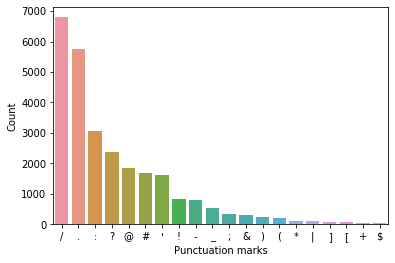

In [246]:
#Punctuations in non-disaster
sb.barplot(x = 'Punctuation marks',y = 'Count',data = z1)

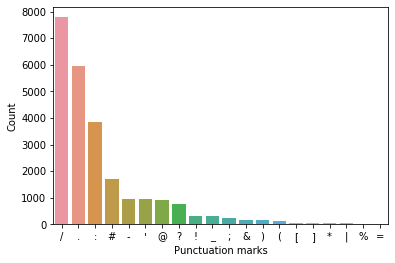

In [247]:
#Punctuations in Disaster
sb.barplot(x = 'Punctuation marks',y = 'Count',data = z2)

In [281]:
#Data cleaning

In [547]:
#Removing stopwords
stop = set(stopwords.words('english'))
train['text'] = train['text'].str.lower()
train['clean_text'] = train['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop]))

In [548]:
train.head()

,id,keyword,location,text,target,clean_text
0,1,Unknown,Other_location,our deeds are the reason of this #earthquake m...,1,deeds reason #earthquake may allah forgive us
1,4,Unknown,Other_location,forest fire near la ronge sask. canada,1,forest fire near la ronge sask. canada
2,5,Unknown,Other_location,all residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,Unknown,Other_location,just got sent this photo from ruby #alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...


In [913]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
train['clean_tweet'] = train['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [914]:
#Removing http and https
train['clean_tweet'] = train['clean_tweet'].apply(lambda x :' '.join([word for word in x.split() if not word.startswith('http')]))
train['clean_tweet'] = train['clean_tweet'].apply(lambda x :' '.join([word for word in x.split() if not word.startswith('https')]))

In [551]:
train.shape

(7613, 6)

In [556]:
train.head()

,id,keyword,location,text,target,clean_text
0,1,Unknown,Other_location,our deeds are the reason of this #earthquake m...,1,deed reason #earthquak may allah forgiv u
1,4,Unknown,Other_location,forest fire near la ronge sask. canada,1,forest fire near la rong sask. canada
2,5,Unknown,Other_location,all residents asked to 'shelter in place' are ...,1,resid ask 'shelter place' notifi officers. eva...
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1,"13,000 peopl receiv #wildfir evacu order calif..."
4,7,Unknown,Other_location,just got sent this photo from ruby #alaska as ...,1,got sent photo rubi #alaska smoke #wildfir pou...


In [566]:
train1 = train

In [567]:
train1.drop('id',inplace=True,axis=1)
train1.drop('keyword',inplace=True,axis=1)
train1.drop('location',inplace=True,axis=1)
train1.drop('text',inplace=True,axis=1)

In [569]:
train1 = train1[['clean_text','target']]

In [656]:
train1.head()

,Clean_Text,target
0,deed reason earthquak may allah forgiv u,1
1,forest fire near la rong sask canada,1
2,resid ask shelter place notifi offic evacu she...,1
3,peopl receiv wildfir evacu order california,1
4,got sent photo rubi alaska smoke wildfir pour ...,1


In [915]:
#Tokenization
corpus_list = []
for i in range(0,7613):
    tweet = re.sub('[^a-zA-Z]',' ',train['clean_tweet'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus_list.append(tweet)

In [916]:
#Checking the created corpus
print(corpus_list[0:5])
print(len(corpus_list))

['deed reason thi earthquak may allah forgiv u', 'forest fire near la rong sask canada', 'resid ask shelter place notifi offic evacu shelter place order expect', 'peopl receiv wildfir evacu order california', 'got sent thi photo rubi alaska smoke wildfir pour school']
7613


In [921]:
#Converting the list to a dataframe to visualise a wordcloud
corp2 = pd.DataFrame(corpus_list)
corp2.head()
train1 = pd.concat([train,corp2],axis = 1)

In [922]:
train1.head()

,id,keyword,location,text,target,clean_tweet,0
0,1,Unknown,Other_location,Our Deeds are the Reason of this #earthquake M...,1,deed reason thi #earthquak may allah forgiv u,deed reason thi earthquak may allah forgiv u
1,4,Unknown,Other_location,Forest fire near La Ronge Sask. Canada,1,forest fire near La rong sask. canada,forest fire near la rong sask canada
2,5,Unknown,Other_location,All residents asked to 'shelter in place' are ...,1,resid ask 'shelter place' notifi officers. No ...,resid ask shelter place notifi offic evacu she...
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1,"13,000 peopl receiv #wildfir evacu order calif...",peopl receiv wildfir evacu order california
4,7,Unknown,Other_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent thi photo rubi #alaska smoke #wildfir...,got sent thi photo rubi alaska smoke wildfir p...


In [923]:
train1.head()

,id,keyword,location,text,target,clean_tweet,0
0,1,Unknown,Other_location,Our Deeds are the Reason of this #earthquake M...,1,deed reason thi #earthquak may allah forgiv u,deed reason thi earthquak may allah forgiv u
1,4,Unknown,Other_location,Forest fire near La Ronge Sask. Canada,1,forest fire near La rong sask. canada,forest fire near la rong sask canada
2,5,Unknown,Other_location,All residents asked to 'shelter in place' are ...,1,resid ask 'shelter place' notifi officers. No ...,resid ask shelter place notifi offic evacu she...
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1,"13,000 peopl receiv #wildfir evacu order calif...",peopl receiv wildfir evacu order california
4,7,Unknown,Other_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent thi photo rubi #alaska smoke #wildfir...,got sent thi photo rubi alaska smoke wildfir p...


In [924]:
train1.head()

,id,keyword,location,text,target,clean_tweet,0
0,1,Unknown,Other_location,Our Deeds are the Reason of this #earthquake M...,1,deed reason thi #earthquak may allah forgiv u,deed reason thi earthquak may allah forgiv u
1,4,Unknown,Other_location,Forest fire near La Ronge Sask. Canada,1,forest fire near La rong sask. canada,forest fire near la rong sask canada
2,5,Unknown,Other_location,All residents asked to 'shelter in place' are ...,1,resid ask 'shelter place' notifi officers. No ...,resid ask shelter place notifi offic evacu she...
3,6,Unknown,Other_location,"13,000 people receive #wildfires evacuation or...",1,"13,000 peopl receiv #wildfir evacu order calif...",peopl receiv wildfir evacu order california
4,7,Unknown,Other_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent thi photo rubi #alaska smoke #wildfir...,got sent thi photo rubi alaska smoke wildfir p...


In [925]:
train1 = train1.rename({0:'Clean_Text'},axis = 'columns')

In [929]:
train1.drop('location',inplace=True,axis=1)

In [930]:
train1.head()

,target,Clean_Text
0,1,deed reason thi earthquak may allah forgiv u
1,1,forest fire near la rong sask canada
2,1,resid ask shelter place notifi offic evacu she...
3,1,peopl receiv wildfir evacu order california
4,1,got sent thi photo rubi alaska smoke wildfir p...


In [931]:
#Rearranging columns
train1 = train1[['Clean_Text','target']]

In [932]:
train1.head()

,Clean_Text,target
0,deed reason thi earthquak may allah forgiv u,1
1,forest fire near la rong sask canada,1
2,resid ask shelter place notifi offic evacu she...,1
3,peopl receiv wildfir evacu order california,1
4,got sent thi photo rubi alaska smoke wildfir p...,1


In [933]:
train1.to_csv('Disdata.csv')

In [585]:
#Generating word cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im
mask = np.array(Image.open('mask.png'))

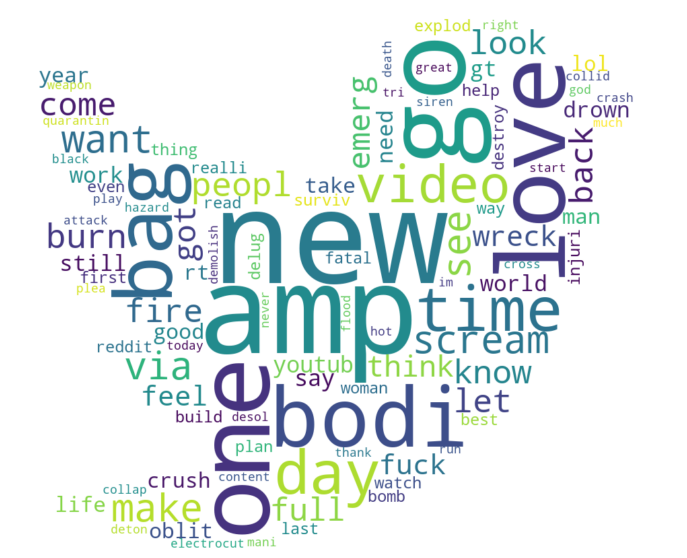

In [586]:
#Non-disaster tweets
normal_words = ' '.join([word for word in train1['Clean_Text'][train1['target'] == 0]])
wc = WordCloud(background_color="white", max_words=100, mask=mask,collocations=False)
wc.generate(normal_words)
plt.figure(figsize= (20,10))
plt.imshow(wc, interpolation='bilinear')
#plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()

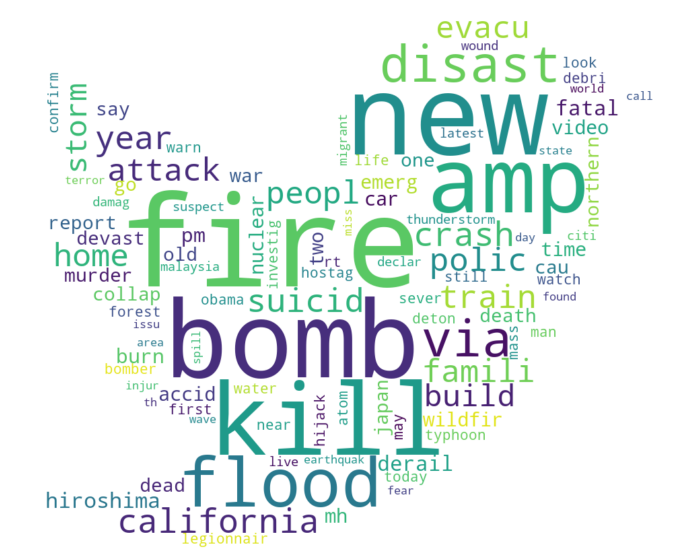

In [587]:
#Disaster tweets
mask = np.array(Image.open('mask.png'))
normal_words = ' '.join([word for word in train1['Clean_Text'][train1['target'] == 1]])
wc = WordCloud(background_color="white", max_words=100, mask=mask,collocations=False)
wc.generate(normal_words)
plt.figure(figsize= (20,10))
plt.imshow(wc, interpolation='bilinear')
#plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()

In [693]:
#Bag of words vectorizer Unigrams
X_train, X_test, y_train, y_test = train_test_split(train1['Clean_Text'], train1['target'], test_size = 0.3, random_state=0, shuffle = True, stratify=train1['target'])
bow_vectorizer = CountVectorizer()
X_train_vect = bow_vectorizer.fit_transform(X_train)

In [694]:
#TF-IDF vectorizer Unigrams
X1_train, X1_test, y1_train, y1_test = train_test_split(train1['Clean_Text'], train1['target'], test_size = 0.3, random_state=0, shuffle = True, stratify=train1['target'])
tfidf_vectorizer = TfidfVectorizer()
X1_train_vect = tfidf_vectorizer.fit_transform(X1_train)

In [597]:
#Random Forest with Bag of words
rf = Pipeline([('bow_vectorizer', CountVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred))
print('Accuracy of the model is',accuracy_score(y_test, y_pred)*100,'%')
print(f1_score(y_test, y_pred))

Predicted     0    1
Actual              
0          1185  118
1           369  612
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1303
           1       0.84      0.62      0.72       981

    accuracy                           0.79      2284
   macro avg       0.80      0.77      0.77      2284
weighted avg       0.80      0.79      0.78      2284

Accuracy of the model is 78.67775831873905 %
0.7153711279953243


In [598]:
#Random Forest with TF-IDF
rf1 = Pipeline([('tfidf_vectorizer', TfidfVectorizer()), ('rf1', RandomForestClassifier())])
rf1.fit(X1_train, y1_train)
y1_pred = rf1.predict(X1_test)
print(pd.crosstab(y1_test,y1_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y1_pred))
print('Accuracy of the model is',accuracy_score(y1_test, y1_pred)*100,'%')
print(f1_score(y1_test, y1_pred))

Predicted     0    1
Actual              
0          1155  148
1           367  614
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1303
           1       0.81      0.63      0.70       981

    accuracy                           0.77      2284
   macro avg       0.78      0.76      0.76      2284
weighted avg       0.78      0.77      0.77      2284

Accuracy of the model is 77.45183887915937 %
0.7045324153757887


In [601]:
#Logistic Regression with Bag of words
lr = Pipeline([('bow_vectorizer', CountVectorizer()), ('lr', LogisticRegression())])
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred))
print('Accuracy of the model is',accuracy_score(y_test, y_pred)*100,'%')
print(f1_score(y_test, y_pred))

Predicted     0    1
Actual              
0          1147  156
1           294  687
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1303
           1       0.81      0.70      0.75       981

    accuracy                           0.80      2284
   macro avg       0.81      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

Accuracy of the model is 80.29772329246934 %
0.7532894736842106


In [603]:
#Logistic Regression with TF-IDF
lr1 = Pipeline([('tfidf_vectorizer', TfidfVectorizer()), ('lr1', RandomForestClassifier())])
lr1.fit(X1_train, y1_train)
y1_pred = lr1.predict(X1_test)
print(pd.crosstab(y1_test,y1_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y1_pred))
print('Accuracy of the model is',accuracy_score(y1_test, y1_pred)*100,'%')
print(f1_score(y1_test, y1_pred))

Predicted     0    1
Actual              
0          1143  160
1           367  614
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1303
           1       0.79      0.63      0.70       981

    accuracy                           0.77      2284
   macro avg       0.78      0.75      0.76      2284
weighted avg       0.77      0.77      0.76      2284

Accuracy of the model is 76.92644483362521 %
0.6997150997150997


In [606]:
#Naive Bayes with Bag of words
nb = Pipeline([('bow_vectorizer', CountVectorizer()), ('nb', MultinomialNB())])
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred))
print('Accuracy of the model is',accuracy_score(y_test, y_pred)*100,'%')
print(f1_score(y_test, y_pred))

Predicted     0    1
Actual              
0          1119  184
1           265  716
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1303
           1       0.80      0.73      0.76       981

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.80      2284
weighted avg       0.80      0.80      0.80      2284

Accuracy of the model is 80.34150612959719 %
0.7612971823498139


In [610]:
#Naive Bayes with TF-IDF
nb1 = Pipeline([('tfidf_vectorizer', TfidfVectorizer()), ('nb1', MultinomialNB())])
nb1.fit(X1_train, y1_train)
y1_pred = nb1.predict(X1_test)
print(pd.crosstab(y1_test,y1_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y1_pred))
print('Accuracy of the model is',accuracy_score(y1_test, y1_pred)*100,'%')
print(f1_score(y1_test, y1_pred))

Predicted     0    1
Actual              
0          1175  128
1           324  657
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1303
           1       0.84      0.67      0.74       981

    accuracy                           0.80      2284
   macro avg       0.81      0.79      0.79      2284
weighted avg       0.81      0.80      0.80      2284

Accuracy of the model is 80.21015761821366 %
0.7440543601359004


In [613]:
#Decision tree with Bag of words
dt = Pipeline([('bow_vectorizer', CountVectorizer()), ('dt', DecisionTreeClassifier())])
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred))
print('Accuracy of the model is',accuracy_score(y_test, y_pred)*100,'%')
print(f1_score(y_test, y_pred))

Predicted     0    1
Actual              
0          1073  230
1           325  656
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1303
           1       0.74      0.67      0.70       981

    accuracy                           0.76      2284
   macro avg       0.75      0.75      0.75      2284
weighted avg       0.76      0.76      0.76      2284

Accuracy of the model is 75.70052539404554 %
0.7027316550615962


In [615]:
#Decision Tree with TF-IDF
dt1 = Pipeline([('tfidf_vectorizer', TfidfVectorizer()), ('dt1', DecisionTreeClassifier())])
dt1.fit(X1_train, y1_train)
y1_pred = dt1.predict(X1_test)
print(pd.crosstab(y1_test,y1_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y1_pred))
print('Accuracy of the model is',accuracy_score(y1_test, y1_pred)*100,'%')
print(f1_score(y1_test, y1_pred))

Predicted     0    1
Actual              
0          1013  290
1           310  671
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1303
           1       0.70      0.68      0.69       981

    accuracy                           0.74      2284
   macro avg       0.73      0.73      0.73      2284
weighted avg       0.74      0.74      0.74      2284

Accuracy of the model is 73.73029772329247 %
0.6910401647785788


In [632]:
#Bag of words vectorizer(Bigrams)
X_train, X_test, y_train, y_test = train_test_split(train1['Clean_Text'], train1['target'], test_size = 0.3, random_state=0, shuffle = True, stratify=train1['target'])
bow_vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,2))
X_train_vect = bow_vectorizer.fit_transform(X_train)

In [633]:
#TF-IDF vectorizer(Bigrams)
X1_train, X1_test, y1_train, y1_test = train_test_split(train1['Clean_Text'], train1['target'], test_size = 0.3, random_state=0, shuffle = True, stratify=train1['target'])
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
X1_train_vect = tfidf_vectorizer.fit_transform(X1_train)

In [638]:
#Random Forest with Bag of words(Bigrams)
rf = Pipeline([('bow_vectorizer', CountVectorizer(stop_words='english',ngram_range=(1,2))), ('rf', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred))
print('Accuracy of the model is',accuracy_score(y_test, y_pred)*100,'%')
print(f1_score(y_test, y_pred))

Predicted     0    1
Actual              
0          1207   96
1           439  542
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      1303
           1       0.85      0.55      0.67       981

    accuracy                           0.77      2284
   macro avg       0.79      0.74      0.74      2284
weighted avg       0.78      0.77      0.75      2284

Accuracy of the model is 76.57618213660245 %
0.6695491043854231


In [640]:
#Random Forest with TF-IDF(Bigrams)
rf1 = Pipeline([('tfidf_vectorizer', TfidfVectorizer(stop_words='english',ngram_range=(1,2))), ('rf1', RandomForestClassifier())])
rf1.fit(X1_train, y1_train)
y1_pred = rf1.predict(X1_test)
print(pd.crosstab(y1_test,y1_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y1_pred))
print('Accuracy of the model is',accuracy_score(y1_test, y1_pred)*100,'%')
print(f1_score(y1_test, y1_pred))

Predicted     0    1
Actual              
0          1196  107
1           431  550
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1303
           1       0.84      0.56      0.67       981

    accuracy                           0.76      2284
   macro avg       0.79      0.74      0.74      2284
weighted avg       0.78      0.76      0.75      2284

Accuracy of the model is 76.4448336252189 %
0.6715506715506715


In [643]:
#Logistic Regression with Bag of words(Bigrams)
lr = Pipeline([('bow_vectorizer', CountVectorizer(stop_words='english',ngram_range=(2,2))), ('lr', LogisticRegression())])
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred))
print('Accuracy of the model is',accuracy_score(y_test, y_pred)*100,'%')
print(f1_score(y_test, y_pred))

Predicted     0    1
Actual              
0          1259   44
1           559  422
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      1303
           1       0.91      0.43      0.58       981

    accuracy                           0.74      2284
   macro avg       0.80      0.70      0.70      2284
weighted avg       0.78      0.74      0.71      2284

Accuracy of the model is 73.59894921190893 %
0.5832757429163787


In [646]:
#Logistic Regression with TF-IDF(Bigrams)
lr1 = Pipeline([('tfidf_vectorizer', TfidfVectorizer(stop_words='english',ngram_range=(1,2))), ('lr1', RandomForestClassifier())])
lr1.fit(X1_train, y1_train)
y1_pred = lr1.predict(X1_test)
print(pd.crosstab(y1_test,y1_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y1_pred))
print('Accuracy of the model is',accuracy_score(y1_test, y1_pred)*100,'%')
print(f1_score(y1_test, y1_pred))

Predicted     0    1
Actual              
0          1167  136
1           376  605
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1303
           1       0.82      0.62      0.70       981

    accuracy                           0.78      2284
   macro avg       0.79      0.76      0.76      2284
weighted avg       0.78      0.78      0.77      2284

Accuracy of the model is 77.5831873905429 %
0.7026713124274099


In [651]:
#Naive Bayes with Bag of words(Bigrams)
nb = Pipeline([('bow_vectorizer', CountVectorizer(ngram_range=(1,2))), ('nb', MultinomialNB())])
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred))
print('Accuracy of the model is',accuracy_score(y_test, y_pred)*100,'%')
print(f1_score(y_test, y_pred))

Predicted     0    1
Actual              
0          1129  174
1           275  706
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1303
           1       0.80      0.72      0.76       981

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.80      2284
weighted avg       0.80      0.80      0.80      2284

Accuracy of the model is 80.34150612959719 %
0.7587318645889307


In [654]:
#Naive Bayes with TF-IDF(Bigrams)
nb1 = Pipeline([('tfidf_vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('nb1', MultinomialNB())])
nb1.fit(X1_train, y1_train)
y1_pred = nb1.predict(X1_test)
print(pd.crosstab(y1_test,y1_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y1_pred))
print('Accuracy of the model is',accuracy_score(y1_test, y1_pred)*100,'%')
print(f1_score(y1_test, y1_pred))

Predicted     0    1
Actual              
0          1194  109
1           338  643
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1303
           1       0.86      0.66      0.74       981

    accuracy                           0.80      2284
   macro avg       0.82      0.79      0.79      2284
weighted avg       0.81      0.80      0.80      2284

Accuracy of the model is 80.42907180385289 %
0.742065781881131


In [668]:
#Training models with cross validation
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer  
cv = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')  
X = cv.fit_transform(cor).toarray()
z = pd.DataFrame(X)

In [670]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(cor).toarray()

In [672]:
#Preparing the test array
Y = train1.iloc[:,1].values

In [678]:
#Logistic Regression using 10 fold - cross validation(Bag of words)
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, X, Y, cv=10, scoring='accuracy')
print(scores)
s0 = scores.mean()
print(s0)

[0.71166448 0.55511811 0.52299606 0.51116951 0.56504599 0.63600526
 0.6412615  0.6346912  0.71353482 0.73193167]
0.6223418597799146


In [679]:
#Logistic Regression using 10 fold - cross validation(TFIDF)
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, X1, Y, cv=10, scoring='accuracy')
print(scores)
s0 = scores.mean()
print(s0)

[0.72477064 0.62204724 0.58869908 0.61498029 0.62680683 0.65045992
 0.65571616 0.64914586 0.71222076 0.78318003]
0.6628026821907362


In [680]:
#Naive Bayes using 10 fold - cross validation(Bag of words)
from sklearn.model_selection import cross_val_score
nb = MultinomialNB()
scores = cross_val_score(nb, X, Y, cv=10, scoring='accuracy')
print(scores)
s0 = scores.mean()
print(s0)

[0.71952818 0.61417323 0.61103811 0.52036794 0.6412615  0.6609724
 0.69382392 0.70302234 0.72404731 0.73587385]
0.6624108765328733


In [681]:
#Naive Bayes using 10 fold - cross validation(Bag of words)
from sklearn.model_selection import cross_val_score
nb = MultinomialNB()
scores = cross_val_score(nb, X1, Y, cv=10, scoring='accuracy')
print(scores)
s0 = scores.mean()
print(s0)

[0.71952818 0.62860892 0.63994744 0.5781866  0.67411301 0.67148489
 0.70696452 0.68988173 0.75689882 0.76346912]
0.6829083225649971


In [682]:
#Random Forest using 10 fold - cross validation(Bag of words)
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, Y, cv=10, scoring='accuracy')
print(scores)
s0 = scores.mean()
print(s0)

[0.69593709 0.55380577 0.45729304 0.38633377 0.48883049 0.60972405
 0.53745072 0.60052562 0.6346912  0.6544021 ]
0.5618993850256053


In [714]:
train1.head()

,Clean_Text,target
0,deed reason earthquak may allah forgiv u,1
1,forest fire near la rong sask canada,1
2,resid ask shelter place notifi offic evacu she...,1
3,peopl receiv wildfir evacu order california,1
4,got sent photo rubi alaska smoke wildfir pour ...,1


In [843]:
#Modelling part 2 (Without pipeline)
#Bag of words
cv = CountVectorizer()
X = cv.fit_transform(cor1)
y = train1['target'].values

#TFIDF
tfidf = TfidfVectorizer()
X = cv.fit_transform(cor1)
y = train1['target'].values

In [718]:
#Split the train data set to train and test data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=2020)
X1_train , X1_test , y1_train , y1_test = train_test_split(X1,y,test_size=0.2, random_state=2020)


In [722]:
#Logistic Regression(Bag of words)
# Fitting Logistic Regression Model to the Training set
lr = LogisticRegression()
lr.fit(X_train, y_train)
# Predicting the Train data set results
y_pred_lr = lr.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test,y_pred_lr,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred_lr))

#Calculating Model Accuracy
print('Logistic Regression Model Accuracy Score for Train Data set is {}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Model Accuracy Score for Test Data set is {}'.format(lr.score(X_test, y_test)))
print('Logistic Regression Model F1 Score is {}'.format(f1_score(y_test, y_pred_lr)))

Predicted    0    1
Actual             
0          755   94
1          197  477
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       849
           1       0.84      0.71      0.77       674

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

Logistic Regression Model Accuracy Score for Train Data set is 0.9533661740558292
Logistic Regression Model Accuracy Score for Test Data set is 0.8089297439264609
Logistic Regression Model F1 Score is 0.7662650602409639


In [727]:
#Logistic Regression(TFIDF)
# Fitting Logistic Regression Model to the Training set
lr = LogisticRegression()
lr.fit(X1_train, y1_train)
# Predicting the Train data set results
y_pred_lr = lr.predict(X1_test)
# Making the Confusion Matrix
print(pd.crosstab(y1_test,y_pred_lr,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y_pred_lr))

#Calculating Model Accuracy
print('Logistic Regression Model Accuracy Score for Train Data set is {}'.format(lr.score(X1_train, y1_train)))
print('Logistic Regression Model Accuracy Score for Test Data set is {}'.format(lr.score(X1_test, y1_test)))
print('Logistic Regression Model F1 Score is {}'.format(f1_score(y1_test, y_pred_lr)))

Predicted    0    1
Actual             
0          795   54
1          242  432
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       849
           1       0.89      0.64      0.74       674

    accuracy                           0.81      1523
   macro avg       0.83      0.79      0.79      1523
weighted avg       0.82      0.81      0.80      1523

Logistic Regression Model Accuracy Score for Train Data set is 0.8839080459770114
Logistic Regression Model Accuracy Score for Test Data set is 0.8056467498358503
Logistic Regression Model F1 Score is 0.7448275862068966


In [732]:
#Random Forest with bag of words -
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Predicting the Train data set results
y_pred_rf = rf.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test,y_pred_rf,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred_rf))

#Calculating Model Accuracy
print('Random Forest Model Accuracy Score for Train Data set is {}'.format(rf.score(X_train, y_train)))
print('Random Forest Model Accuracy Score for Test Data set is {}'.format(rf.score(X_test, y_test)))
print('Random Forest Model F1 Score is {}'.format(f1_score(y_test, y_pred_rf)))

Predicted    0    1
Actual             
0          764   85
1          267  407
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       849
           1       0.83      0.60      0.70       674

    accuracy                           0.77      1523
   macro avg       0.78      0.75      0.76      1523
weighted avg       0.78      0.77      0.76      1523

Random Forest Model Accuracy Score for Train Data set is 0.9706075533661741
Random Forest Model Accuracy Score for Test Data set is 0.7688772160210111
Random Forest Model F1 Score is 0.6981132075471698


In [755]:
#Random Forest(TFIDF)
rf1 = RandomForestClassifier()
rf1.fit(X1_train, y1_train)
# Predicting the Train data set results
y_pred_rf1 = rf1.predict(X1_test)
# Making the Confusion Matrix
print(pd.crosstab(y1_test,y_pred_rf1,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y_pred_rf1))

#Calculating Model Accuracy
print('Random Forest Model Accuracy Score for Train Data set is {}'.format(rf1.score(X1_train, y1_train)))
print('Random Forest Model Accuracy Score for Test Data set is {}'.format(rf1.score(X1_test, y1_test)))
print('Random Forest Model F1 Score is {}'.format(f1_score(y1_test, y_pred_rf1)))

Predicted    0    1
Actual             
0          764   85
1          248  426
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       849
           1       0.83      0.63      0.72       674

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.78      0.78      1523

Random Forest Model Accuracy Score for Train Data set is 0.9669950738916256
Random Forest Model Accuracy Score for Test Data set is 0.7813525935653316
Random Forest Model F1 Score is 0.7189873417721517


In [799]:
#Naive Bayes with bag of words -
nb = MultinomialNB()
nb.fit(X_train, y_train)
# Predicting the Train data set results
y_pred_nb = nb.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test,y_pred_nb,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred_nb))

#Calculating Model Accuracy
print('Naive Bayes Model Accuracy Score for Train Data set is {}'.format(nb.score(X_train, y_train)))
print('Naive Bayes Model Accuracy Score for Test Data set is {}'.format(nb.score(X_test, y_test)))
print('Naive Bayes Model F1 Score is {}'.format(f1_score(y_test, y_pred_nb)))

Predicted    0    1
Actual             
0          718  131
1          180  494
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       849
           1       0.79      0.73      0.76       674

    accuracy                           0.80      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.80      0.80      0.79      1523

Naive Bayes Model Accuracy Score for Train Data set is 0.906568144499179
Naive Bayes Model Accuracy Score for Test Data set is 0.7957977675640184
Naive Bayes Model F1 Score is 0.7605850654349501


In [778]:
#Naive Bayes(TFIDF)
nb1 = MultinomialNB()
nb1.fit(X1_train, y1_train)
# Predicting the Train data set results
y_pred_nb1 = nb1.predict(X1_test)
# Making the Confusion Matrix
print(pd.crosstab(y1_test,y_pred_nb1,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y_pred_nb1))

#Calculating Model Accuracy
print('Naive Bayes Model Accuracy Score for Train Data set is {}'.format(nb1.score(X1_train, y1_train)))
print('Naive Bayes Model Accuracy Score for Test Data set is {}'.format(nb1.score(X1_test, y1_test)))
print('Naive Bayes Model F1 Score is {}'.format(f1_score(y1_test, y_pred_nb1)))

Predicted    0    1
Actual             
0          768   81
1          221  453
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       849
           1       0.85      0.67      0.75       674

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523

Naive Bayes Model Accuracy Score for Train Data set is 0.8940886699507389
Naive Bayes Model Accuracy Score for Test Data set is 0.8017071569271176
Naive Bayes Model F1 Score is 0.7499999999999999


In [781]:
#Thus the best model is Naive bayes with least number of False Negatives.
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [857]:
test = pd.read_csv("Disaster_test.csv")
df = pd.read_csv("sample_submission.csv")

In [858]:
train1.head()

,Clean_Text,target
0,deed reason earthquak may allah forgiv u,1
1,forest fire near la rong sask canada,1
2,resid ask shelter place notifi offic evacu she...,1
3,peopl receiv wildfir evacu order california,1
4,got sent photo rubi alaska smoke wildfir pour ...,1


In [859]:
x = train1["Clean_Text"]
y = train1["target"]

In [860]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [861]:
cv = CountVectorizer(stop_words = 'english')
x_train_cv = vect.fit_transform(X_train)
x_test_cv = vect.transform(X_test)

In [873]:
nb = MultinomialNB()
nb.fit(x_train_cv, y_train)
pred = nb.predict(x_test_cv)
print(pd.crosstab(y_test,pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, pred))
print('Accuracy of the model is {}%'.format(round(accuracy_score(y_test,pred)*100),2))

Predicted    0    1
Actual             
0          727  147
1          174  475
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       874
           1       0.76      0.73      0.75       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Accuracy of the model is 79.0%


In [874]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [876]:
#Predicting on the test dataset
y_test = test["text"]
y_test_cv = vect.transform(y_test)
preds = nb.predict(y_test_cv)

In [934]:
#Preparing the submission file
df["target"] = preds
df.to_csv("submission.csv",index=False)